In [1]:
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

# returns a dataframe with the frequency of digits 0-9 from given list of nums
def get_frequencies(nums):
    freqs_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    for num in nums:
        if not pd.isna(num):
            freqs_list[num] += 1
    freqs_df = pd.DataFrame(freqs_list, index=range(0, 10), columns=['freq'])

    return freqs_df

#returns the first digit after the decimal point
def first_after_decimal(num):
    if pd.isna(num):
        return
    if num == 0:
        return
    else:
        num = int(num)
        return(first_digit(abs(num)))
#     return(first_digit(abs(num)))
#     return int((abs(float(num)) * 10) % 10)

In [2]:
def first_digit(num):
    if pd.isna(num):
        return
    v = str(num)[-1]
    if v == '.':
        return
#     print(int(str(num)))
    return int(str(num)[-1])

In [3]:
all_files = ["Data/Drivingdata_cols.csv"] # "Data/5.csv","Data/28.csv","Data/35.csv","Data/53.csv",

#  "Data/71.csv", "Data/1.csv", "Data/14.csv", "Data/19_SHORT.csv", "Data/22.csv",
#             "Data/25.csv", "Data/32_LETTER.csv", "Data/34.csv", "Data/36.csv",
#             "Data/42.csv", "Data/43.csv", "Data/47.csv", "Data/48.csv", "Data/49.csv", "Data/50.csv",
#             "Data/51.csv", "Data/54.csv", "Data/56.csv", "Data/59.csv",
#             "Data/63.csv", "Data/67.csv", "Data/68.csv",
#             "Data/70.csv", "Data/72.csv", "Data/76.csv", "Data/79.csv",
#             "Data/80.csv", "Data/82.csv", "Data/91.csv"

In [4]:
df2 = pd.DataFrame(index=range(0, 10))

i = 1
std_devs = {}

for file in all_files:
    print(i)
    i += 1
    data = pd.read_csv(file, na_values=['-', 'ND'], header=[0])
    last_digits = [] #
    last_digit_dict = {}
    last_digit_freq = {}

    for column in data:
        nums = data[column]
        last_digit = [first_after_decimal(num) for num in nums]
        #last_digit = [first_digit(num) for num in nums]
        last_digits += last_digit
        last_digit_dict[column] = last_digit
        

    df1 = get_frequencies(last_digits)
    
    column_data = {}
    keys = []
    tags = []

    for key in last_digit_dict.keys():
        frequencies = get_frequencies(last_digit_dict[key])
        frequencies['Percentage'] = frequencies['freq'] / sum(frequencies['freq']) * 100
        last_digit_freq[key] = frequencies

        message = (f"{key}"
        f"{frequencies}"
        f"")
        #print(message)
        
        column_data[key] = frequencies['Percentage']
        keys.append(key)
        
        prevTag = "Previous"
        updateTag = "Update"
        
        if prevTag in key:
            tags.append(prevTag)
            
        elif updateTag in key:
            tags.append(updateTag)
 
    
    df5 = pd.DataFrame(column_data)
    #df5['Average'] = df1['freq'] / sum(df1['freq']) * 100
    print(df5)
#     df5 = df5.drop([0])
    
    std_devs[file] = df5.std(axis = 1)
    print(tags)
    
# print(std_devs)
# df7 = pd.DataFrame(std_devs)
# print(df7)
        
    df1['Percentage'] = df1['freq'] / sum(df1['freq']) * 100
    df2[file] = df1['freq'] / sum(df1['freq']) * 100
    print(df2)


#         df1.columns = ['Element', 'Frequency']
#     df1['Percentage'] = df1['Frequency'] / sum(df1['Frequency']) * 100
#     if first:
#         df2 = df1[['Element', 'Percentage']].copy()
#         df2.rename(columns={'Percentage': file}, inplace=True)
#         first = False
#     else:
#         df2[file] = df1['Frequency'] / sum(df1['Frequency']) * 100

1
   Odom Reading 1 (Previous)  Odom Reading 1 (Update)  \
0                  23.274250                10.401839   
1                   8.189365                10.068209   
2                   8.578266                 9.934757   
3                   8.660534                10.038553   
4                   8.466083                 9.793891   
5                   9.251365                10.149763   
6                   8.593224                 9.801305   
7                   8.458604                 9.838375   
8                   8.159450                 9.823547   
9                   8.368858                10.149763   

   Odom Reading 2 (Previous)  Odom Reading 2 (Update)  \
0                  25.258651                 9.913259   
1                   8.508741                 9.665428   
2                   8.044952                10.054877   
3                   8.401712                10.603647   
4                   8.490903                10.426624   
5                   8.134142

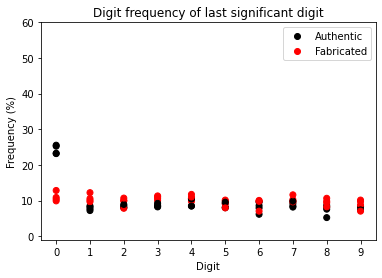

In [26]:
df6 = pd.DataFrame(df5).T.stack().reset_index()#.drop(columns=['level_1'])
df6 = df6.rename(columns={0: "percentage", "level_1": "Digit"})
#print(df6["level_0"])

colors = {"Odom Reading 1 (Previous)": "black", "Odom Reading 1 (Update)": "red", "Odom Reading 2 (Previous)": "black", "Odom Reading 2 (Update)": "red", "Odom Reading 3 (Previous)": "black", "Odom Reading 3 (Update)": "red", "Odom Reading 4 (Previous)": "black", "Odom Reading 4 (Update)":"red"}
authentic = Line2D([], [], marker ='o', color='k', label='Authentic',
                         markerfacecolor='k', markersize=6, linestyle='None')
fabricated = Line2D([], [], marker ='o', color='r', label='Fabricated',
                         markerfacecolor='r', markersize=6, linestyle='None')

plt.scatter(x = 'Digit', y = 'percentage', data = df6, c=df6['level_0'].map(colors))
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.ylim(-1, 60)
plt.ylabel("Frequency (%)")
plt.xlabel("Digit")
plt.title("Digit frequency of last significant digit")
plt.legend(handles=[authentic, fabricated])
#plt.legend(('Authentic', 'Fabricated'))
#plt.savefig('mileage_first_digit', dpi=300)
plt.show()

In [6]:
df6 = df6.astype({'Digit': str})

df6 = pd.pivot_table(df6, values = 'percentage', index = 'level_0', columns = 'Digit').reset_index()
print(df6)

df6['Target'] = tags
print(df6)

Digit                    level_0          0          1          2          3  \
0      Odom Reading 1 (Previous)  23.274250   8.189365   8.578266   8.660534   
1        Odom Reading 1 (Update)  10.401839  10.068209   9.934757  10.038553   
2      Odom Reading 2 (Previous)  25.258651   8.508741   8.044952   8.401712   
3        Odom Reading 2 (Update)   9.913259   9.665428  10.054877  10.603647   
4      Odom Reading 3 (Previous)  23.180380   7.199367   8.069620   8.227848   
5        Odom Reading 3 (Update)  10.884886  10.571652   7.830854  11.041504   
6      Odom Reading 4 (Previous)  25.538462   7.692308   8.923077   9.230769   
7        Odom Reading 4 (Update)  12.844037  12.232416  10.703364  11.314985   

Digit          4          5          6          7          8          9  
0       8.466083   9.251365   8.593224   8.458604   8.159450   8.368858  
1       9.793891  10.149763   9.801305   9.838375   9.823547  10.149763  
2       8.490903   8.134142   7.920086   8.169818   8.651

In [7]:
# plt.boxplot(df7, sym="k.", medianprops=dict(color="black"))
# plt.xticks([0,1,2,3,4,5,6,7,8,9])
# plt.ylim(-1, 40)
# plt.ylabel("Standard Deviation")
# plt.xlabel("Digit")
# plt.title("Standard deviation of digit frequency of first significant digit")
# plt.savefig('Data/fig1a', dpi=300)
# plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
#print(features)

# Separating out the features
x = df6.loc[:, features].values
# # Separating out the target
y = df6.loc[:,['Target']].values
# # # Standardizing the features
x = StandardScaler().fit_transform(x)
#print(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df6[['Target']]], axis = 1)
print(finalDf)

   principal component 1  principal component 2    Target
0              -1.974237              -0.545925  Previous
1               1.348226              -2.027736    Update
2              -2.435011              -0.167916  Previous
3               1.776149              -1.450889    Update
4              -1.863340               0.005238  Previous
5               1.544957              -1.122323    Update
6              -1.261761               2.336949  Previous
7               2.865017               2.972601    Update


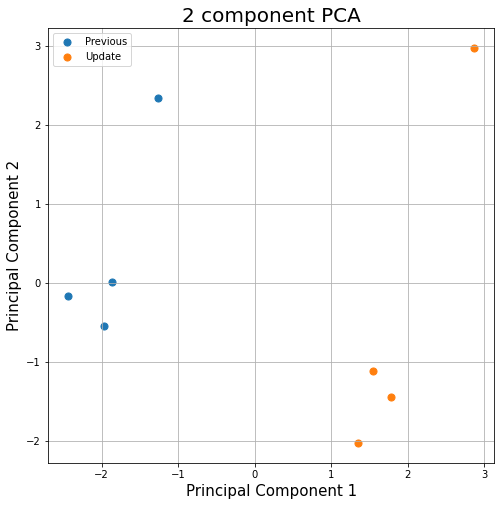

In [9]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [prevTag, updateTag]
for target in targets:
    indicesToKeep = finalDf['Target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , s = 50)
ax.legend(targets)
ax.grid()

fig.savefig('mileage_first_digit_PCA', dpi=300)